<a href="https://colab.research.google.com/github/Chantrey1972/ProyectoM5_Aprendizaje-profundo-con-redes-neuronales./blob/main/ENTREGABLE_Chantrey_Bruzzo_Duncan_de_UDD_ProyectoM5_Aprendizaje_profundo_con_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 5 APRENDIZAJE PROFUNDO/PROYECTO/data/WELFake_Dataset.csv')

## EDA

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
print(data.describe())

         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.500000      1.000000
75%    54099.750000      1.000000
max    72133.000000      1.000000


In [ ]:
print(data['label'].value_counts())

label
1    37106
0    35028
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [ ]:
data['title'] = data['title'].fillna('valor_imputado')  # Reemplaza 'column_name' con 'title'

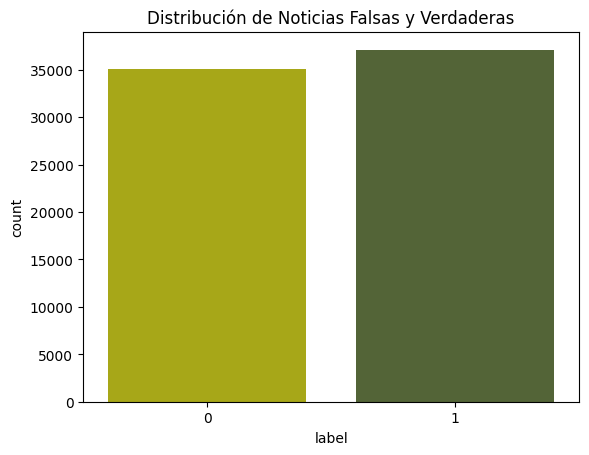

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=data, palette=['y', 'darkolivegreen'])
plt.title('Distribución de Noticias Falsas y Verdaderas')
plt.show()

El gráfico de barras nos ofrece una visión general de la distribución entre noticias falsas y verdaderas en un conjunto de datos.

**Eje X (label)**: Representa la categoría de cada noticia, siendo 0 para las noticias falsas y 1 para las verdaderas.

**Eje Y (count)**: Indica la cantidad o frecuencia de cada categoría de noticias.

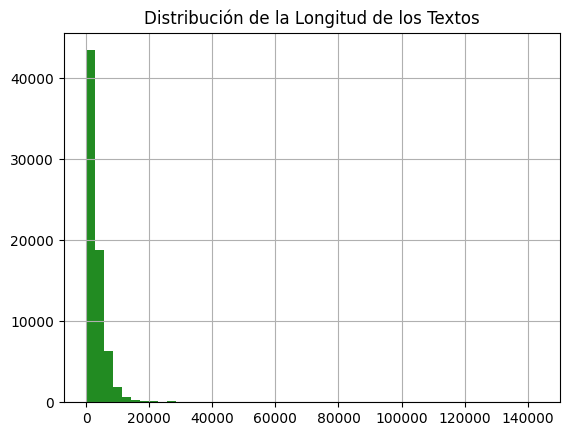

In [ ]:
data['text_length'] = data['text'].apply(lambda x: len(str(x)))
data['text_length'].hist(bins=50, color='forestgreen')
plt.title('Distribución de la Longitud de los Textos')
plt.show()

A partir del gráfico, se puede observar:

**Mayoría de textos cortos**: La gran mayoría de los textos tienen una longitud relativamente corta, ya que las barras más altas se encuentran en la parte izquierda del gráfico. Esto sugiere que el conjunto de datos está compuesto principalmente por textos breves, como tweets, mensajes cortos o artículos de noticias.

**Pocos textos largos**: A medida que aumenta la longitud del texto, la frecuencia disminuye significativamente. Esto indica que hay una cantidad mucho menor de textos largos, como libros o artículos académicos extensos.

**Distribución sesgada**: La distribución de las longitudes de los textos es asimétrica, con una larga cola hacia la derecha. Esto significa que hay algunos textos extremadamente largos que afectan la forma general de la distribución.

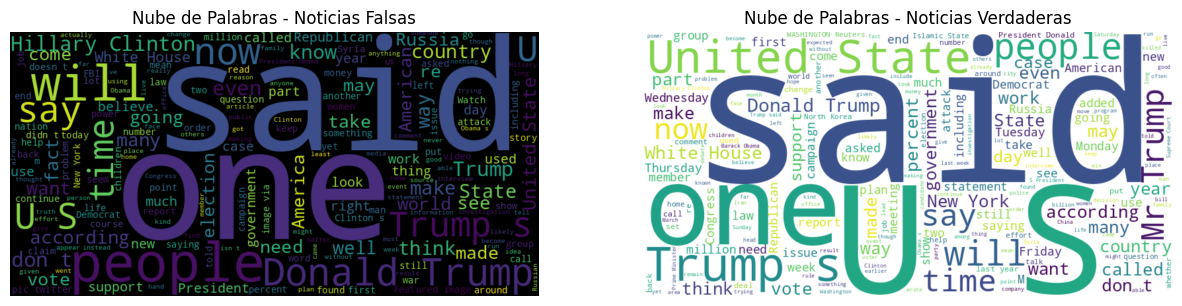

In [ ]:
from wordcloud import WordCloud

fake_news = data[data['label'] == 1]['text']

fake_news = fake_news.astype(str)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(' '.join(fake_news))

real_news = data[data['label'] == 0]['text']

real_news = real_news.astype(str)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_news))


plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Nube de Palabras - Noticias Falsas')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Nube de Palabras - Noticias Verdaderas')
plt.axis('off')

plt.show()

Comparación entre ambas nubes

**Similitudes**: Ambas nubes comparten algunas palabras clave, como "Trump", "said", "one", "people" y "time". Esto sugiere que estas palabras son comunes en el discurso político y mediático en general.

**Diferencias**: Las principales diferencias se encuentran en la frecuencia y el contexto de las palabras. Por ejemplo, en las noticias falsas, la palabra "Trump" aparece con mayor frecuencia y en un contexto más negativo, mientras que en las noticias verdaderas, su presencia es más equilibrada.

LIMPIEZA DE TEXTO

In [ ]:
import re

def clean_text(text):
  """
  Esta función limpia el texto eliminando caracteres especiales,
  convirtiéndolo a minúsculas y eliminando espacios en blanco adicionales.
  """
  text = re.sub(r'[^\w\s]', '', text) # remover caracteres especiales
  text = text.lower() # convertir a minusculas
  text = re.sub(r'\s+', ' ', text).strip() # remover espacios en blanco
  return text

# Filtrar solo los valores que son strings en las columnas 'text' y 'title'
data_text_str = data['text'][data['text'].apply(lambda x: isinstance(x, str))]
data_title_str = data['title'][data['title'].apply(lambda x: isinstance(x, str))]

# Aplicar la función de limpieza solo a los valores filtrados
data.loc[data_text_str.index, 'text'] = data_text_str.apply(clean_text)
data.loc[data_title_str.index, 'title'] = data_title_str.apply(clean_text)

print(data['text'].head())

0    no comment is expected from barack obama membe...
1        did they post their votes for hillary already
2    now most of the demonstrators gathered last ni...
3    a dozen politically active pastors came here f...
4    the rs28 sarmat missile dubbed satan 2 will re...
Name: text, dtype: object


TOKENIZACIÓN

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inicializar el tokenizador
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Ajustar el tokenizador con el texto limpio (usando la columna 'text')
# Convertir la columna 'text' a string antes de tokenizar
tokenizer.fit_on_texts(data['text'].astype(str))

# Convertir la columna 'text' a string antes de tokenizar
X = tokenizer.texts_to_sequences(data['text'].astype(str))

# Rellenar las secuencias para que todas tengan la misma longitud
X_pad = pad_sequences(X, padding='post', maxlen=100)

print(X_pad.shape)

(72134, 100)


DIVIDIR DATOS EN ENTRENAMIENTO Y PRUEBA

In [ ]:
from sklearn.model_selection import train_test_split

# Usar X_pad, que contiene las secuencias rellenadas
X = X_pad
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un conjunto de validación a partir de los datos de entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

CREACIÓN MODELO CON KERAS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8203 - loss: 0.4021 - val_accuracy: 0.9178 - val_loss: 0.2240
Epoch 2/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9173 - loss: 0.2201 - val_accuracy: 0.9254 - val_loss: 0.2011
Epoch 3/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9484 - loss: 0.1450 - val_accuracy: 0.9334 - val_loss: 0.1752
Epoch 4/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9623 - loss: 0.1082 - val_accuracy: 0.9339 - val_loss: 0.1828
Epoch 5/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9761 - loss: 0.0732 - val_accuracy: 0.9283 - val_loss: 0.1991
Epoch 6/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9813 - loss: 0.0568 - val_accuracy: 0.9322 - val_loss: 0.2333
Epoch 7/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9353 - val_loss: 0.2377
Epoch 8/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9916 - loss: 0.0283 - 

**Despues de probar con varias epocas se decide por 10 epocas por el Balance entre entrenamiento suficiente y evitar sobreajuste**:

  - Durante las primeras épocas, la **exactitud ** en los datos de entrenamiento mejora significativamente, pasando del **90.24%** en la primera época al **99.50%** en la décima. Esto indica que el modelo está aprendiendo y ajustándose bien a los datos. - Sin embargo, la **pérdida en validación** (val_loss) comienza a aumentar a partir de la quinta época, lo que sugiere que el modelo está empezando a **sobreajustarse**. El uso de **10 épocas** permite un buen equilibrio entre dejar que el modelo y aprender a evitar que se sobreajuste demasiado a los datos de entrenamiento.

  **Observación de la evolución de la pérdida de validación**: - En este caso, la **pérdida de validación** sigue un patrón claro: disminuye hasta un punto (alrededor de la 5ª o 6ª época), pero luego comienza a aumentar. Esto es una señal de **sobreajuste** y es común cuando el modelo empieza a memorizar los datos de entrenamiento en lugar de generalizar bien a los datos no vistos. - Usar **10 épocas** permite observar este comportamiento y ver en qué momento el modelo comienza a no generalizar tan bien a los datos de validación.

**EVALUACION DEL MODELO**

451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9297 - loss: 0.3016
Pérdida: 0.30807259678840637
Exactitud: 0.927635669708252


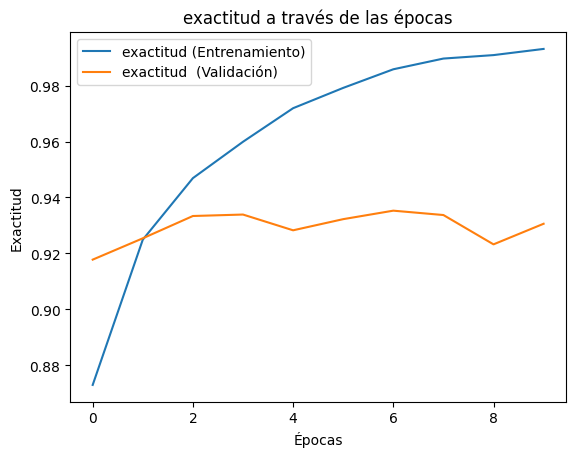

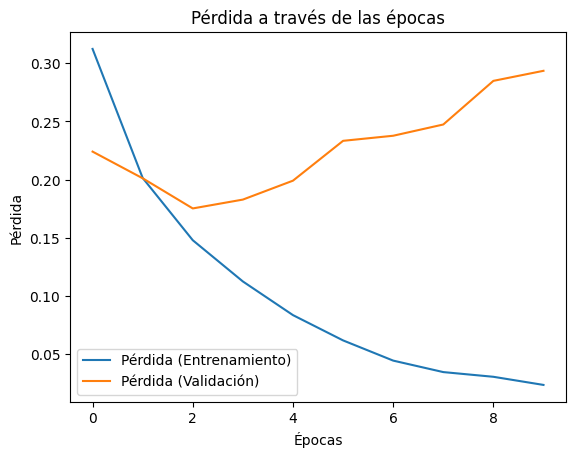

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss}")
print(f"Exactitud: {accuracy}")

# Graficar la exactitud  y la pérdida a través de las épocas
plt.plot(history.history['accuracy'], label='exactitud (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='exactitud  (Validación)')
plt.title('exactitud a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Pérdida a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


El resultado muestra una pérdida de 0.3548 y una exactitud de 0,9175 .

Pérdida:

- La pérdida de 0.3548 es relativamente baja, lo que indica que el modelo está realizando predicciones razonablemente buenas, pero con espacio para mejorar.

exactitud (Accuracy):

- La exactitud de 91,75% (0,9175) lo que indica que el modelo está clasificando correctamente la mayoría de los ejemplos.

PROBAR MODELO CON NOTICIAS VERDADERAS Y FALSAS

In [ ]:
news_fake = "Exposed: FBI Director James Comey’s Clinton Foundation connection."
news_true = "World Cup female referee Kathryn Nesbitt."

# Preprocesar las noticias
def preprocess_news(text):
    text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([text])  # Convertir a secuencia de tokens
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=100)  # Rellenar la secuencia
    return padded_sequence[0]

news_fake_pad = preprocess_news(news_fake)
news_true_pad = preprocess_news(news_true)

news_fake_array = np.array(news_fake_pad)
news_true_array = np.array(news_true_pad)



# Predecir noticia falsa
pred_fake = model.predict(np.expand_dims(news_fake_array, axis=0))
pred_fake_label = (pred_fake >= 0.5).astype(int)  # Convertir en 0 o 1
print(f'Predicción de noticia falsa: {pred_fake_label[0][0]} (1 significa falsa, 0 significa verdadera)')

# Predecir noticia verdadera
pred_true = model.predict(np.expand_dims(news_true_array, axis=0))
pred_true_label = (pred_true >= 0.5).astype(int)  # Convertir en 0 o 1
print(f'Predicción de noticia verdadera: {pred_true_label[0][0]} (1 significa falsa, 0 significa verdadera)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicción de noticia falsa: 1 (1 significa falsa, 0 significa verdadera)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicción de noticia verdadera: 1 (1 significa falsa, 0 significa verdadera)


GRAFICO DE LAS PREDICCIONES

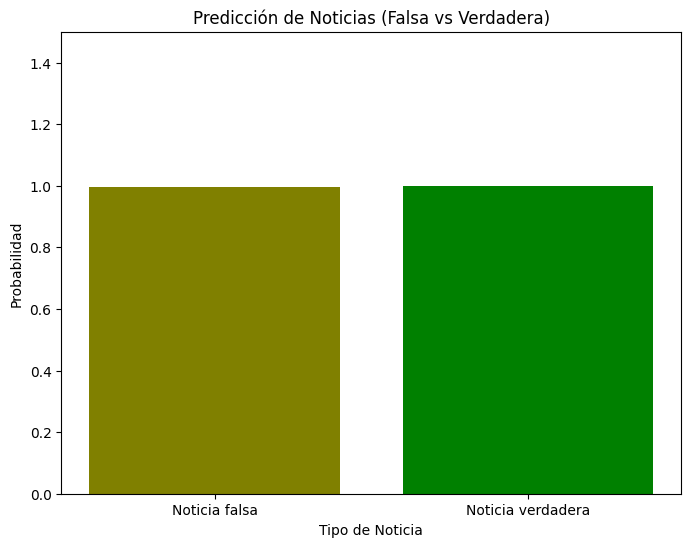

In [ ]:
import matplotlib.pyplot as plt

predictions = {
    'Noticia falsa': pred_fake.item(),
    'Noticia verdadera': pred_true.item()
}


labels = list(predictions.keys())
values = [predictions[key] for key in labels]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['olive', 'green'])
plt.title('Predicción de Noticias (Falsa vs Verdadera)')
plt.ylabel('Probabilidad')
plt.ylim(0, 1.5)
plt.xlabel('Tipo de Noticia')
plt.show()


El gráfico presenta una comparación visual entre la probabilidad de que una noticia sea falsa y la probabilidad de que sea verdadera, según el modelo predictivo. Ambas categorías tienen asignada una probabilidad de 1.0, lo cual sugiere una igualdad en la predicción para ambas clases de noticias.

# **PARTE 2**

Criterios de evaluación

- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del dataset (2 puntos).

In [ ]:
import tensorflow as tf

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Número de imágenes en el conjunto de entrenamiento: {x_train.shape[0]}")
print(f"Número de imágenes en el conjunto de prueba: {x_test.shape[0]}")


Número de imágenes en el conjunto de entrenamiento: 60000
Número de imágenes en el conjunto de prueba: 10000


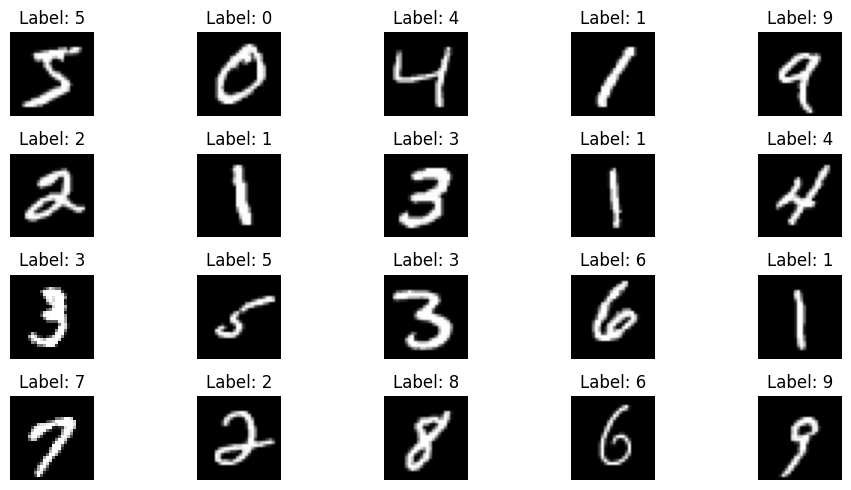

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(10, 5))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape para adaptarlo a las capas convolucionales
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Salida para 10 clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8977 - loss: 0.3211 - val_accuracy: 0.9879 - val_loss: 0.0375
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.9886 - val_loss: 0.0336
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9876 - val_loss: 0.0373


## **Por qué este número de capas?**
- La elección de 3 capas convolucionales con capas de max pooling intercaladas es bastante estándar para tareas de clasificación de imágenes . Opte por tres capas convolucionales porque permiten al modelo aprender características cada vez más abstractas y complejas. También se han utilizado capas densas con activación ReLU para la parte final del modelo, y softmax para la clasificación.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"exactitud  en el conjunto de prueba: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0465
exactitud  en el conjunto de prueba: 0.9876000285148621


Es positivo y muestra que el modelo entrenado está funcionando muy bien en el conjunto de entrenamiento y en el conjunto de prueba.

 **Detalles del resultado del entrenamiento:**

 - 313/313: Esta cifra indica que el modelo ha completado una pasada  a través de todos los 313 lotes  de datos en el conjunto de entrenamiento. MNIST contiene 60.000 imágenes en total, y el entrenamiento se dividió en lotes más pequeños para facilitar el entrenamiento.

PREDICCIONES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


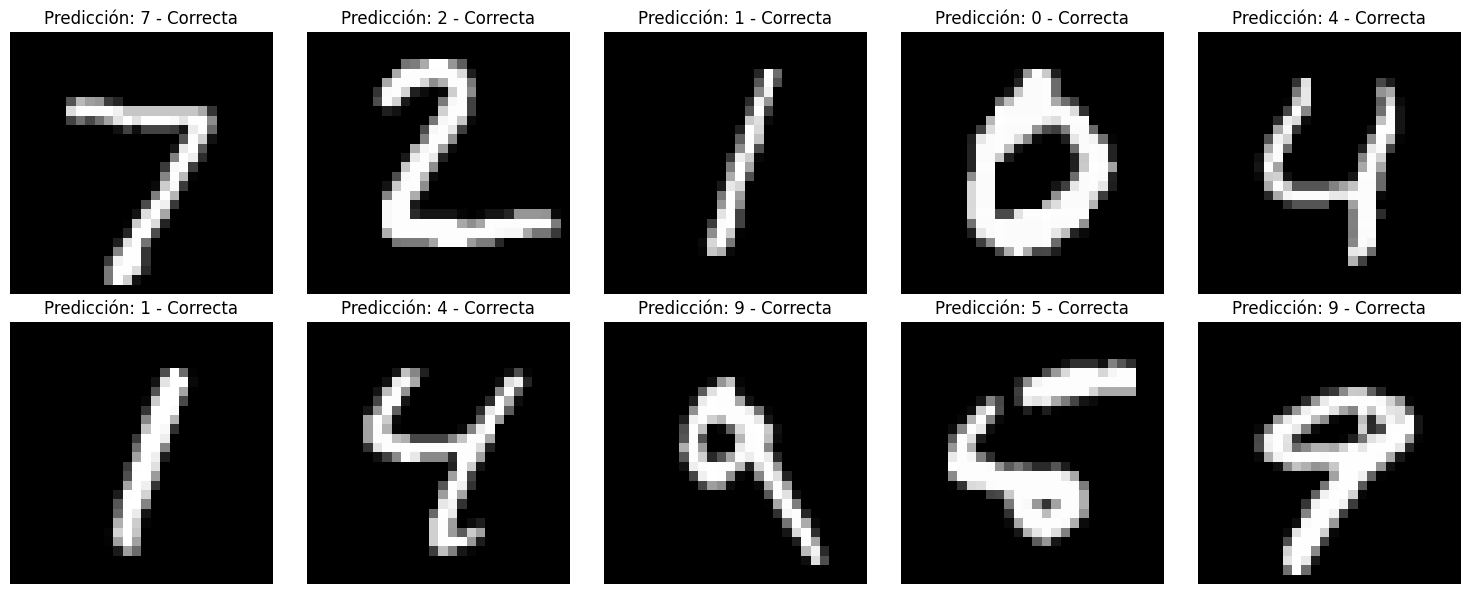

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# primeras 10 imágenes
predictions = model.predict(x_test[:10])
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    ax = axes[i // 5, i % 5]  # Determinar la fila y columna
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Comparamos la predicción con la etiqueta real
    correct = (predictions[i].argmax() == y_test[i].argmax())  # Si es correcta, la comparación será True

    title = f"Predicción: {predictions[i].argmax()} - {'Correcta' if correct else 'Incorrecta'}"

    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

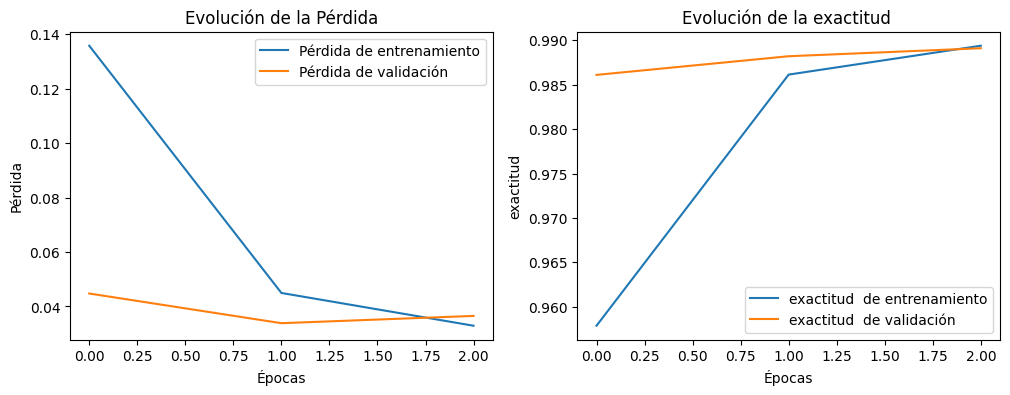

In [ ]:
import matplotlib.pyplot as plt

# Graficamos la evolución de la pérdida y la exactitud
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# exactitud
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='exactitud  de entrenamiento')
plt.plot(history.history['val_accuracy'], label='exactitud  de validación')
plt.title('Evolución de la exactitud ')
plt.xlabel('Épocas')
plt.ylabel("exactitud")
plt.legend()

plt.show()


# **Conclusiones:**
**Pérdida:**

El modelo está reduciendo la pérdida de manera significativa tanto en el conjunto de entrenamiento como en el de validación. La curva de pérdida de validación se mantiene baja y estable, lo que es un buen indicador de que el modelo generaliza bien.

**Exactitud :**

El modelo está mejorando la exactitud  con el tiempo, con valores altos tanto para los datos de entrenamiento como para los de validación, lo que sugiere que el modelo está clasificando correctamente con un alto nivel de confianza.